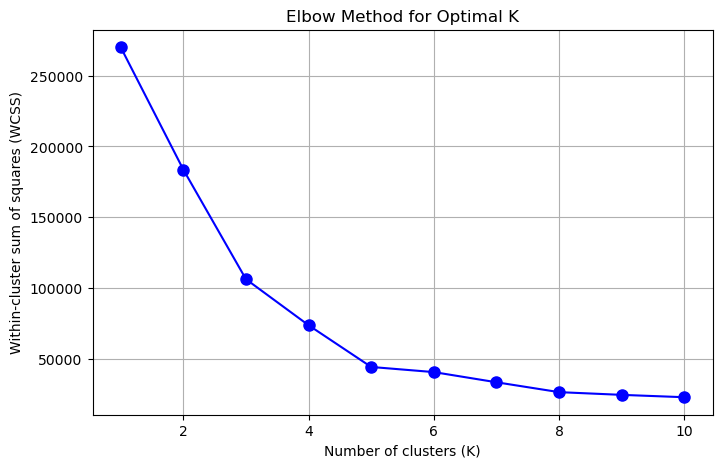

Silhouette Score for K=5: 0.554


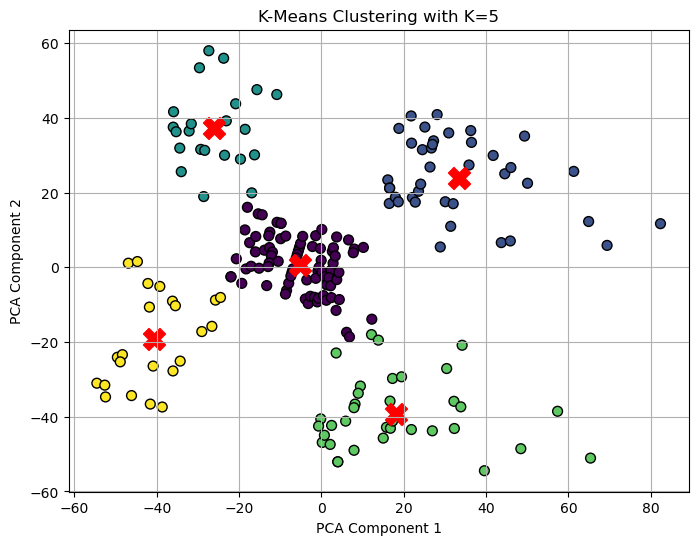

In [15]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load dataset
filename = r"C:\Users\User\Downloads\Mall_Customers.csv"
try:
    df = pd.read_csv(filename)
except FileNotFoundError:
    print(f"Error: File '{filename}' not found. Please check the filename and path.")
    raise

# Select features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values

# Use PCA to reduce to 2D (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Elbow method to find optimal K
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# From elbow plot, choose K (for example 5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Silhouette Score evaluation
sil_score = silhouette_score(X_pca, clusters)
print(f'Silhouette Score for K={optimal_k}: {sil_score:.3f}')

# Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=250, c='red', marker='X')
plt.title(f'K-Means Clustering with K={optimal_k}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()
